# Data Collection  
In this notebook, I collected data using a function to query Edamam's Recipe Search API.  

#### Importing libraries

In [5]:
#Libraries for general analysis and data set manipulation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for gathering data using the Edamam API:
import requests
import json
import time

#### Information about use of Edamam's API

I decided early on to upgrade from a free Edamam developer account to an Enterprise developer account (which cost me 29 USD). This enabled me to acquire recipes based on dish type, I was able to get more detailed data (including more information such as dish type, meal type, and cuisine type for recipes), and I was no longer limited to 5 calls to the API per minute.  I also was able to get up to 1000 recipes per query rather than only 100 recipes per query.  

Terms of use for use of the Edamam API: https://developer.edamam.com/about/terms

Data dictionary for Edamam's recipe API:   
https://developer.edamam.com/edamam-docs-recipe-api

In [2]:
#App ID and key used for queries (note that I will change these values before I place this notebook
#on my public GitHub account):
id_i =  #my app ID (removed for security purposes)
key_i = #my app key (removed for security purposes)
#Note that I'm not creating an app, but most developers seem to use Edamam information for app development.

#### Sample query to the Edamam recipe API:

In [ ]:
nutrient_of_interest = 'CA' #calcium
qry = f'nutrients%5B{nutrient_of_interest}%5D={0}-{70}' #will look at recipes with 0-70 mg of calcium
meal = 'dinner' #will look at recipes with mealType = 'dinner'
url = f'https://api.edamam.com/search?q=&app_id={id_i}&app_key={key_i}&{qry}&dishType={meal}&from={0}&to={100}'
res = requests.get(url) #requesting information from the API
print(res.status_code) #checking the request was successful (if the value is not in the 400's and is in the 200's)
the_json = res.json() #placing the recipe data in json format
type(the_json) #checking the data is in json format (dictionary type)

In [ ]:
#Inspecting the keys of the_json (looking at the first recipe out of the 100 recipes):
the_json['hits'][0]['recipe'].keys() 

#### Looking at the contents of the recipe data:

The following keys were found in each recipe's json file when creating the function to acquire recipe data:
- uri: Uniform Resource Identifier (provides means for identifying a resource online, according to Daniel Miessler) 
- label: Title of the recipe 
- image: Image used in the recipe  
- source: Website the recipe came from  
- url:  Uniform Resource Locator (a URL is a subset of URIs, and it provides a means of locating a resource by describing its primary access mechanism (e.g., its network “location”), according to Daniel Miessler. 
- shareAs: Another location to the recipe (looks like a URL)  
- yield: Number of servings in the recipe 
- dietLabels: Diet categories the recipe would qualify for
- healthLabels: Health categories the recipe would qualify for
- cautions: Health categories the recipe would not qualify for (for example, if the recipe is not gluten free, there would be a caution about containing gluten)
- ingredientLines: Lines with ingredients the recipe calls for
- ingredients: More concise recipe information than ingredientLines
- calories: Number of kcal in the recipe 
- totalWeight: Total weight of all ingredients in the recipe
- totalTime: Total active time to prepare the meal (or other type of food)
- cuisineType: Cuisine type such as Mexican, Indian, Chinese, Japanese, etc. of the recipe
- mealType: Meal type such as breads, sauces, roasts, etc. of the recipe
- dishType: Dish type such as breakfast, lunch, dinner, dessert, nibble, etc. of the recipe
- totalNutrients: Nutrient content of the food in the recipe (more details below)
- totalDaily: Percent of recommended daily value (if available) of the food in the recipe (more details below)
- digest: Contains totalNutrient and totalDaily information as well as whether a recommended daily value (RDA) exists for the nutrients in the food in the recipe (more detail below)

Sources:  
Daniel Miessler, https://danielmiessler.com/study/url-uri/

#### Looking at the categorical data in more detail:

**Diet Labels**:
- Diet: balanced: Protein/Fat/Carb values in 15/35/50 ratio
- Diet: high-fiber: More than 5g fiber per serving
- Diet: high-protein: More than 50% of total calories from proteins
- Diet: low-carb: Less than 20% of total calories from carbs
- Diet: low-fat: Less than 15% of total calories from fat
- Diet: low-sodium: Less than 140mg Na per serving

Note that I might not to use the diet labels above because a lot of resources give ranges instead of strict values to categorize meals as balanced, low-carb, etc.  I decided to collect this data anyway, and I'll look further into this data during exploratory data analysis (EDA).  During feature engineering, I might make my own diet labels.

Example source with ranges:   
https://blog.myfitnesspal.com/ask-the-dietitian-whats-the-best-carb-protein-and-fat-breakdown-for-weight-loss/

**Health Labels:**
- Health: alcohol-free: No alcohol used or contained
- Health: celery-free: does not contain celery or derivatives
- Health: crustacean-free: does not contain crustaceans (shrimp, lobster etc.) or derivatives
- Health: dairy-free:	No dairy; no lactose
- Health: egg-free: No eggs or products containing eggs
- Health: fish-free: No fish or fish derivatives
- Health: gluten-free: No ingredients containing gluten
- Health: keto-friendly: Maximum 7 grams of net carbs per serving
- Health: kidney-friendly: per serving – phosphorus less than 250 mg AND potassium less than 500 mg AND sodium: less than 500 mg
- Health: kosher: contains only ingredients allowed by the kosher diet. However it does not guarantee kosher preparation of the ingredients themselves
- Health: low-potassium: Less than 150mg per serving
- Health: lupine-free: does not contain lupine or derivatives
- Health: mustard-free: does not contain mustard or derivatives
- Health: No-oil-added: No oil added except to what is contained in the basic ingredients
- Health: low-sugar: No simple sugars – glucose, dextrose, galactose, fructose, sucrose, lactose, maltose
- Health: paleo: Excludes what are perceived to be agricultural products; grains, legumes, dairy products, potatoes, refined salt, refined sugar, and processed oils
- Health: peanut-free: No peanuts or products containing peanuts
- Health: pescatarian: Does not contain meat or meat based products, can contain dairy and fish
- Health: pork-free: does not contain pork or derivatives
- Health: red-meat-free: does not contain beef, lamb, pork, duck, goose, game, horse, and other types of red meat or products containing red meat.
- Health: sesame-free: does not contain sesame seed or derivatives
- Health: shellfish-free: No shellfish or shellfish derivatives
- Health: soy-free: No soy or products containing soy
- Health: sugar-conscious: Less than 4g of sugar per serving
- Health: tree-nut-free: No tree nuts or products containing tree nuts
- Health: vegan: No meat, poultry, fish, dairy, eggs or honey
- Health: vegetarian: No meat, poultry, or fish
- Health: wheat-free: No wheat, can have gluten though

I added a mollusk-free category which was not in the data dictionary, but it showed up in the healthLabels in a json file when I was setting up the data collection function. Examples of mollusks are "snails, clams, mussels, squid, and octopods" (octopus) (source: http://www.oceanicresearch.org/education/wonders/mollusk.html).

**Cautions:**  
During set-up of the data collection function, the cautions values were inspeced.  It looks like the cautions list contains a few items such as cautions about containing wheat, sulfites, etc.  These caution values seem to vary quite a bit from recipe to recipe, and the values are not explained comprehensively in the data dictionary, so the caution values will be collected and parsed later.  

**Cuisine Type:**
There are a lot of cuisines types such as Mexican, Indian, Chinese, Japanese, etc., and there was no comprehensive list of cuisine types in the data dictionary.  Therefore, cuisine type values will be collected and organized into dummy columns later instead of making dummy columns for cuisine types during data acquisition.

**Meal Type:**  
There are a lot of meal types such as breads, sauces, roasts, etc., and there was no comprehensive list of meal types in the data dictionary.  Therefore, meal type values will be collected and organized into dummy columns later instead of making dummy columns for meal types during data acquisition.

**Dish Type:**  
The recipes with the following dish types will be collected, and the dish type values will be collected to verify a good amount recipes for each dish type were collected.
- Breakfast
- Lunch
- Dinner
- Dessert
- Nibble (equivalent of a snack or appetizer)

**Nutrients (Collecting Values in Units of Mass and in Percent Daily Value)**:

- CA: Calcium (units: mg)	
- CHOCDF: Carbs (units: g)	
- CHOLE: Cholesterol (units: mg)
- ENERC_KCAL: Energy (units: kcal)
- FAMS: Monounsaturated fat (units: g)
- FAPU: Polyunsaturated fat (units: g)
- FASAT: Saturated fat (units: g)	
- FAT: Fat (units: g)	
- FATRN: Trans fat (units: g)	
- FE: Iron (units: mg)
- FIBTG: Fiber (units: g)
- FOLDFE: Folate (Equivalent) (units: æg (mcg))
- K: Potassium (units: mg)
- MG: Magnesium (units: mg)
- NA: Sodium (units: mg)
- NIA: Niacin (B3) (units: mg)
- P: Phosphorus (units: mg)
- PROCNT: Protein (units: g)	
- RIBF: Riboflavin (B2) (units: mg)
- SUGAR: Sugars (units: g)
- THIA: Thiamin (B1) (units: mg)
- TOCPHA:  Vitamin E (units: mg)	
- VITA_RAE: Vitamin A (units: æg (mcg))
- VITB6A: Vitamin B6 (units: mg)
- VITB12: Vitamin B12 (units: æg (mcg))	
- VITC: Vitamin C (units: mg)	
- VITD: Vitamin D (units: æg (mcg))	
- VITK1: Vitamin K (units: æg (mcg))

**Digest Values:**  
The digest data contain the same information as total nutrients data and percent of daily value data, so digest data will not be saved when pulling and saving recipe data.  There was information about whether RDA values were available for each nutrient in the digest data, but this can be inferred if there are null values for percent of daily value datapoints for certain nutrients in the dataset. 

#### Gathering Data from Edamam Using Nutrient Ranges
The function below will be used to streamline the process of gathering data based on nutrient ranges.

In [3]:
def recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt): 
#nutrient_of_interest is a string (string value matches the value in the Edamam query documentation),
#and we want to find recipes with amount of the nutrient of interest up to the max_amt value we set when
#calling this function
    
    #Instantiating a recipes dataframe:
    recipes = pd.DataFrame()

    #Instantiating lists that will be used to make columns in the recipes dataframe:
    list_count = [] #this will be a list to see if will always get 100 recipes in each call
    uri_list = []
    title_list = []
    image_list = []
    source_list = []
    url_list = []
    share_as_list = []
    yield_list = []
    diet_labels_list = []
    health_labels_list = []
    cautions_list = []
    list_ingredients_lines = []
    list_ingredients = []   
    calories_list = []
    total_weight_list = []
    total_time_list = []
    cuisine_type_list = []
    meal_type_list = []
    dish_type_list = []
    #Nutrients (unpacking and saving information from totalNutrients and totalDaily sections):
    calcium_mg = [] #amount in units that make sense for that nutrient
    calcium_pct = [] #percent of daily value for that nutrient
    carbs_g = []
    carbs_pct = []
    cholesterol_mg = []
    cholesterol_pct = []
    energy_kcal = []
    energy_pct = []
    monounsat_fat_g = []
    monounsat_fat_pct = []
    polyunsat_fat_g = []
    polyunsat_fat_pct = []
    sat_fat_g = []
    sat_fat_pct = []
    fat_g = []
    fat_pct = []
    trans_fat_g = []
    trans_fat_pct = []
    iron_mg = []
    iron_pct = []
    fiber_g = []
    fiber_pct = []
    folate_mcg = []
    folate_pct = []
    potassium_mg = []
    potassium_pct = []
    magnesium_mg = []
    magnesium_pct = []
    sodium_mg = []
    sodium_pct = []
    niacin_mg = []
    niacin_pct = []
    phosphorus_mg = []
    phosphorus_pct = []
    protein_g = []
    protein_pct = []
    riboflavin_mg = []
    riboflavin_pct = []
    sugar_g = []
    sugar_pct = []
    thiamin_mg = []
    thiamin_pct = []
    vit_E_mg = []
    vit_E_pct = []
    vit_A_mcg = []
    vit_A_pct = []
    vit_B6_mg = []
    vit_B6_pct = []
    vit_B12_mcg = []
    vit_B12_pct = []
    vit_C_mg = []
    vit_C_pct = []
    vit_D_mcg = []
    vit_D_pct = []
    vit_K_mcg = []
    vit_K_pct = []

    #Making a list of 4 equally spaced values which will be used to build 3 ranges (of equal size)
    #(recipes will be found with these ranges of amounts of the nutrient of interest) 
    nutr_amt = np.linspace(start = 0, stop = max_amt, num = 4, dtype = int)
    
    #Generating a list of 11 equally spaced values which will be used to build 10 ranges (of equal size = 100)
    #This is for the from=[value]&to=[value]
    #Can only gather 100 recipes in one call to the API, and can only gather 1000 total recipes of a specific
    #query, so will gather and save query results 0-100 in one loop, 100-200, in another loop, etc. until 
    #have gathered the 1000 query results (and a query will be performed for 3 ranges of the amount of the 
    #nutrient of interest)
    n_rslt = np.linspace(start = 0, stop = 1000, num = 11, dtype = int) #n_rslt is short for number of result

    #Doing queries to collect recipes for meals, drinks, snacks, etc. with specified nutrient ranges, and
    #finding and collecting first 0-100, 100-200, ..., 900-1000 recipes in queries for each of those
    #specified nutrient ranges (due to API limit of 100 recipes per call):
    for n in range(len(n_rslt)-1):
        for m in range(len(nutr_amt)-1):
            #Creating the query (qry) string (for the nutrient of interest, 
            #find recipes with nutrient amount j to nutrient amtount j+1):
            qry = f'nutrients%5B{nutrient_of_interest}%5D={nutr_amt[m]}-{nutr_amt[m+1]}&dishType={dish_type}' 
            #Creating the url using the qry for ranges of query values i to i+1:
            url = f'https://api.edamam.com/search?q=&app_id={id_i}&app_key={key_i}&{qry}&from={n_rslt[n]}&to={n_rslt[n+1]}'
            #Requesting data from the Edamam API using the url defined above:
            res = requests.get(url)
            #Checking the request was successful:
            print(res.status_code)
            #Placing the requested data in json format:
            the_json = res.json()
            #Printing the number of hits that were collected in this query:
            print(len(the_json['hits']))#(if enough recipes for query, should collect 100 recipes in each API call)
            #Printing the first recipe's url for this query:
            if len(the_json['hits']) != 0:
                print(the_json['hits'][0]['recipe']['url'])

            for i in range(len(the_json['hits'])):
                list_count.append(i) #this will be a list to see if will always get 100 recipes in each call
                uri_list.append(the_json['hits'][i]['recipe']['uri'])
                title_list.append(the_json['hits'][i]['recipe']['label'])
                image_list.append(the_json['hits'][i]['recipe']['image'])
                source_list.append(the_json['hits'][i]['recipe']['source'])
                url_list.append(the_json['hits'][i]['recipe']['url'])    
                share_as_list.append(the_json['hits'][i]['recipe']['shareAs'])
                yield_list.append(the_json['hits'][i]['recipe']['yield'])
                diet_labels_list.append(the_json['hits'][i]['recipe']['dietLabels'])
                health_labels_list.append(the_json['hits'][i]['recipe']['healthLabels'])
                cautions_list.append(the_json['hits'][i]['recipe']['cautions'])
                list_ingredients_lines.append(the_json['hits'][i]['recipe']['ingredientLines'])
                list_ingredients.append(the_json['hits'][i]['recipe']['ingredients'])
                calories_list.append(the_json['hits'][i]['recipe']['calories'])
                total_weight_list.append(the_json['hits'][i]['recipe']['totalWeight'])
                total_time_list.append(the_json['hits'][i]['recipe']['totalTime'])
                dish_type_list.append(the_json['hits'][i]['recipe']['dishType'])
                
                if 'cuisineType' in the_json['hits'][i]['recipe'].keys():
                    cuisine_type_list.append(the_json['hits'][i]['recipe']['cuisineType'])
                else:
                    cuisine_type_list.append('NA')
                
                if 'mealType' in the_json['hits'][i]['recipe'].keys():
                    meal_type_list.append(the_json['hits'][i]['recipe']['mealType'])
                else:
                    meal_type_list.append('NA')

                #Nutrients (unpacking and saving information from totalNutrients and totalDaily sections:
                #(total nutrient content and total daily percentage of nutrients):

                #Calcium:
                if 'CA' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    calcium_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['CA']['quantity'])
                else:
                    calcium_mg.append('NA')

                if 'CA' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    calcium_pct.append(the_json['hits'][i]['recipe']['totalDaily']['CA']['quantity'])
                else:
                    calcium_pct.append('NA')

                #Carbs:
                if 'CHOCDF' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    carbs_g.append(the_json['hits'][i]['recipe']['totalNutrients']['CHOCDF']['quantity'])
                else:
                    carbs_g.append('NA')

                if 'CHOCDF' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    carbs_pct.append(the_json['hits'][i]['recipe']['totalDaily']['CHOCDF']['quantity'])
                else:
                    carbs_pct.append('NA')

                #Cholesterol:
                if 'CHOLE' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    cholesterol_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['CHOLE']['quantity'])
                else:
                    cholesterol_mg.append('NA')

                if 'CHOLE' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    cholesterol_pct.append(the_json['hits'][i]['recipe']['totalDaily']['CHOLE']['quantity'])
                else:
                    cholesterol_pct.append('NA')

                #Energy (kcal):     
                if 'ENERC_KCAL' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    energy_kcal.append(the_json['hits'][i]['recipe']['totalNutrients']['ENERC_KCAL']['quantity'])
                else:
                    energy_kcal.append('NA')

                if 'ENERC_KCAL' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    energy_pct.append(the_json['hits'][i]['recipe']['totalDaily']['ENERC_KCAL']['quantity'])
                else:
                    energy_pct.append('NA')

                #Monounsaturated fat: 
                if 'FAMS' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    monounsat_fat_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FAMS']['quantity'])
                else:
                    monounsat_fat_g.append('NA')

                if 'FAMS' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    monounsat_fat_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FAMS']['quantity'])
                else:
                    monounsat_fat_pct.append('NA')

                #Polyunsaturated fat:    
                if 'FAPU' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    polyunsat_fat_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FAPU']['quantity'])
                else:
                    polyunsat_fat_g.append('NA') 

                if 'FAPU' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    polyunsat_fat_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FAPU']['quantity'])
                else:
                    polyunsat_fat_pct.append('NA')

                #Saturated fat:
                if 'FASAT' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    sat_fat_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FASAT']['quantity'])
                else:
                    sat_fat_g.append('NA') 

                if 'FASAT' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    sat_fat_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FASAT']['quantity'])
                else:
                    sat_fat_pct.append('NA')

                #Total fat:
                if 'FAT' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    fat_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FAT']['quantity'])
                else:
                    fat_g.append('NA')

                if 'FAT' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    fat_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FAT']['quantity'])
                else:
                    fat_pct.append('NA')

                #Trans fat:
                if 'FATRN' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    trans_fat_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FATRN']['quantity'])
                else:
                    trans_fat_g.append('NA')  

                if 'FATRN' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    trans_fat_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FATRN']['quantity'])
                else:
                    trans_fat_pct.append('NA')

                #Iron:
                if 'FE' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    iron_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['FE']['quantity'])
                else:
                    iron_mg.append('NA')

                if 'FE' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    iron_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FE']['quantity'])
                else:
                    iron_pct.append('NA')

                #Fiber:
                if 'FIBTG' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    fiber_g.append(the_json['hits'][i]['recipe']['totalNutrients']['FIBTG']['quantity'])
                else:
                    fiber_g.append('NA')

                if 'FIBTG' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    fiber_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FIBTG']['quantity'])
                else:
                    fiber_pct.append('NA')

                #Folate:
                if 'FOLDFE' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    folate_mcg.append(the_json['hits'][i]['recipe']['totalNutrients']['FOLDFE']['quantity'])
                else:
                    folate_mcg.append('NA')

                if 'FOLDFE' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    folate_pct.append(the_json['hits'][i]['recipe']['totalDaily']['FOLDFE']['quantity'])
                else:
                    folate_pct.append('NA')

                #Potassium:
                if 'K' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    potassium_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['K']['quantity'])
                else:
                    potassium_mg.append('NA')

                if 'K' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    potassium_pct.append(the_json['hits'][i]['recipe']['totalDaily']['K']['quantity'])
                else:
                    potassium_pct.append('NA')

                #Magnesium:
                if 'MG' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    magnesium_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['MG']['quantity'])
                else:
                    magnesium_mg.append('NA')

                if 'MG' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    magnesium_pct.append(the_json['hits'][i]['recipe']['totalDaily']['MG']['quantity'])
                else:
                    magnesium_pct.append('NA')

                #Sodium:
                if 'NA' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    sodium_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['NA']['quantity'])
                else:
                    sodium_mg.append('NA')

                if 'NA' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    sodium_pct.append(the_json['hits'][i]['recipe']['totalDaily']['NA']['quantity'])
                else:
                    sodium_pct.append('NA')

                #Niacin (B3):
                if 'NIA' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    niacin_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['NIA']['quantity'])
                else:
                    niacin_mg.append('NA')

                if 'NIA' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    niacin_pct.append(the_json['hits'][i]['recipe']['totalDaily']['NIA']['quantity'])
                else:
                    niacin_pct.append('NA')

                #Phosphorus:
                if 'P' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    phosphorus_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['P']['quantity'])
                else:
                    phosphorus_mg.append('NA')

                if 'P' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    phosphorus_pct.append(the_json['hits'][i]['recipe']['totalDaily']['P']['quantity'])
                else:
                    phosphorus_pct.append('NA')

                #Protein:
                if 'PROCNT' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    protein_g.append(the_json['hits'][i]['recipe']['totalNutrients']['PROCNT']['quantity'])
                else:
                    protein_g.append('NA')

                if 'PROCNT' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    protein_pct.append(the_json['hits'][i]['recipe']['totalDaily']['PROCNT']['quantity'])
                else:
                    protein_pct.append('NA')

                #Riboflavin (B2):
                if 'RIBF' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    riboflavin_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['RIBF']['quantity'])
                else:
                    riboflavin_mg.append('NA')

                if 'RIBF' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    riboflavin_pct.append(the_json['hits'][i]['recipe']['totalDaily']['RIBF']['quantity'])
                else:
                    riboflavin_pct.append('NA')

                #Sugars:
                if 'SUGAR' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    sugar_g.append(the_json['hits'][i]['recipe']['totalNutrients']['SUGAR']['quantity'])
                else:
                    sugar_g.append('NA')

                if 'SUGAR' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    sugar_pct.append(the_json['hits'][i]['recipe']['totalDaily']['SUGAR']['quantity'])
                else:
                    sugar_pct.append('NA')

                #Thiamin (B1):
                if 'THIA' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    thiamin_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['THIA']['quantity'])
                else:
                    thiamin_mg.append('NA')

                if 'THIA' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    thiamin_pct.append(the_json['hits'][i]['recipe']['totalDaily']['THIA']['quantity'])
                else:
                    thiamin_pct.append('NA')

                #Vitamin E:
                if 'TOCPHA' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_E_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['TOCPHA']['quantity'])
                else:
                    vit_E_mg.append('NA')

                if 'TOCPHA' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_E_pct.append(the_json['hits'][i]['recipe']['totalDaily']['TOCPHA']['quantity'])
                else:
                    vit_E_pct.append('NA')

                #Vitamin A:
                if 'VITA_RAE' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_A_mcg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITA_RAE']['quantity'])
                else:
                    vit_A_mcg.append('NA')

                if 'VITA_RAE' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_A_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITA_RAE']['quantity'])
                else:
                    vit_A_pct.append('NA')

                #Vitamin B6:
                if 'VITB6A' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_B6_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITB6A']['quantity'])
                else:
                    vit_B6_mg.append('NA')

                if 'VITB6A' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_B6_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITB6A']['quantity'])
                else:
                    vit_B6_pct.append('NA')

                #Vitamin B12:
                if 'VITB12' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_B12_mcg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITB12']['quantity'])
                else:
                    vit_B12_mcg.append('NA')

                if 'VITB12' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_B12_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITB12']['quantity'])
                else:
                    vit_B12_pct.append('NA')

                #Vitamin C:
                if 'VITC' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_C_mg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITC']['quantity'])
                else:
                    vit_C_mg.append('NA')

                if 'VITC' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_C_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITC']['quantity'])
                else:
                    vit_C_pct.append('NA')

                #Vitamin D:
                if 'VITD' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_D_mcg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITD']['quantity'])
                else:
                    vit_D_mcg.append('NA')

                if 'VITD' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_D_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITD']['quantity'])
                else:
                    vit_D_pct.append('NA')

                #Vitamin K:
                if 'VITK1' in the_json['hits'][i]['recipe']['totalNutrients'].keys():
                    vit_K_mcg.append(the_json['hits'][i]['recipe']['totalNutrients']['VITK1']['quantity'])
                else:
                    vit_K_mcg.append('NA')

                if 'VITK1' in the_json['hits'][i]['recipe']['totalDaily'].keys():
                    vit_K_pct.append(the_json['hits'][i]['recipe']['totalDaily']['VITK1']['quantity'])
                else:
                    vit_K_pct.append('NA')
            
        
            #2 sec pause to not overload Edamam's server(s) and to look less like a computer program collecting data:
            time.sleep(2)
            
    #Placing the lists into the recipes dataframe (each list is a column):
    recipes['uri'] = uri_list 
    recipes['title'] = title_list 
    recipes['image'] = image_list
    recipes['source'] = source_list 
    recipes['url'] = url_list 
    recipes['share_as'] = share_as_list 
    recipes['yield'] = yield_list 
    recipes['diet_labels'] = diet_labels_list 
    recipes['health_labels'] = health_labels_list 
    recipes['cautions'] = cautions_list 
    recipes['list_ingredients_lines'] = list_ingredients_lines 
    recipes['list_ingredients'] = list_ingredients  
    recipes['calories'] = calories_list 
    recipes['total_weight'] = total_weight_list 
    recipes['total_time'] = total_time_list 
    recipes['cuisine_type'] = cuisine_type_list 
    recipes['meal_type'] = meal_type_list 
    recipes['dish_type'] = dish_type_list 
    recipes['calcium_mg'] = calcium_mg 
    recipes['calcium_pct'] = calcium_pct 
    recipes['carbs_g'] = carbs_g 
    recipes['carbs_pct'] = carbs_pct 
    recipes['cholesterol_mg'] = cholesterol_mg 
    recipes['cholesterol_pct'] = cholesterol_pct 
    recipes['energy_kcal'] = energy_kcal 
    recipes['energy_pct'] = energy_pct 
    recipes['monounsat_fat_g'] = monounsat_fat_g 
    recipes['monounsat_fat_pct'] = monounsat_fat_pct 
    recipes['polyunsat_fat_g'] = polyunsat_fat_g 
    recipes['polyunsat_fat_pct'] = polyunsat_fat_pct 
    recipes['sat_fat_g'] = sat_fat_g 
    recipes['sat_fat_pct'] = sat_fat_pct 
    recipes['fat_g'] = fat_g 
    recipes['fat_pct'] = fat_pct 
    recipes['trans_fat_g'] = trans_fat_g 
    recipes['trans_fat_pct'] = trans_fat_pct 
    recipes['iron_mg'] = iron_mg 
    recipes['iron_pct'] = iron_pct 
    recipes['fiber_g'] = fiber_g 
    recipes['fiber_pct'] = fiber_pct 
    recipes['folate_mcg'] = folate_mcg 
    recipes['folate_pct'] = folate_pct 
    recipes['potassium_mg'] = potassium_mg 
    recipes['potassium_pct'] = potassium_pct 
    recipes['magnesium_mg'] = magnesium_mg 
    recipes['magnesium_pct'] = magnesium_pct 
    recipes['sodium_mg'] = sodium_mg 
    recipes['sodium_pct'] = sodium_pct 
    recipes['niacin_mg'] = niacin_mg 
    recipes['niacin_pct'] = niacin_pct 
    recipes['phosphorus_mg'] = phosphorus_mg 
    recipes['phosphorus_pct'] = phosphorus_pct 
    recipes['protein_g'] = protein_g 
    recipes['protein_pct'] = protein_pct 
    recipes['riboflavin_mg'] = riboflavin_mg 
    recipes['riboflavin_pct'] = riboflavin_pct 
    recipes['sugar_g'] = sugar_g 
    recipes['sugar_pct'] = sugar_pct 
    recipes['thiamin_mg'] = thiamin_mg 
    recipes['thiamin_pct'] = thiamin_pct  
    recipes['vit_A_mcg'] = vit_A_mcg 
    recipes['vit_A_pct'] = vit_A_pct 
    recipes['vit_B6_mg'] = vit_B6_mg 
    recipes['vit_B6_pct'] = vit_B6_pct 
    recipes['vit_B12_mcg'] = vit_B12_mcg 
    recipes['vit_B12_pct'] = vit_B12_pct 
    recipes['vit_C_mg'] = vit_C_mg 
    recipes['vit_C_pct'] = vit_C_pct 
    recipes['vit_D_mcg'] = vit_D_mcg 
    recipes['vit_D_pct'] = vit_D_pct
    recipes['vit_E_mg'] = vit_E_mg 
    recipes['vit_E_pct'] = vit_E_pct
    recipes['vit_K_mcg'] = vit_K_mcg 
    recipes['vit_K_pct'] = vit_K_pct 
    
    recipes.to_csv(f'./data/recipes_dishType_{dish_type}_Nutrient{nutrient_of_interest}_MaxAmt{max_amt}.csv', index=False)
    
#Source for saving without index (to prevent unnamed column from being generated when save to csv):
#https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas

#### Using the function above to collect recipes with various nutrient contents (going nutrient-by-nutrient) and looking at recipes for breakfast, lunch, dinner, dessert, and nibble dish types

**NOTE:**  
This recommender will be built for average caloric and nutritional intake, and a medical professional should be consulted before starting a diet.  This recommender will be built to help people with deciding on which recipes to use for meals or snacks or desserts they want to make, but this recommender will not replace medical recommendations and advice.

Recipes were collected using various ranges of nutritional content.  Caution should be taken when building meal plans and diet plans because deficiency of nutrients and excessive ingestion of nutrients can cause complications. 

Note that if someone is training for an endurance race or a weightlifting competition, or if there is some other circumstance (such as lack of ability to absorb certain nutrients or pregnancy or lactation), the person who is using the recommender can ingest needed nutrition by eating more than one serving of dishes, taking multivitamins, and/or most importantly by consulting a nutritionist and/or another medical professional.  

**Calcium:** 500 to 700 mg/day recommended by Harvard University

Source:
https://www.health.harvard.edu/staying-healthy/how-much-calcium-do-you-really-need

In [633]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'breakfast'

#Running the function to collect recipes with the defined nutrient of interest amounts up to the 
#maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2014/01/peach-maple-ginger-smoothie-recipe.html
200
100
http://www.seriouseats.com/recipes/2012/04/maple-bacon-pancakes-recipe.html
200
100
http://www.marthastewart.com/355859/plum-butter
200
100
http://www.finecooking.com/recipes/pumpkin-bread-pudding.aspx
200
100
https://www.allrecipes.com/recipe/126012/cheesy-baked-eggs/
200
100
http://www.thekitchn.com/baking-recipe-whole-wheat-sandwich-breadrecipes-from-the-kitchn-167267
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a36729/ham-cheese-breakfast-bake-recipe-ghk0914/
200
100
http://www.food.com/recipe/breakfast-quesadillas-378790
200
100
https://food52.com/recipes/49385-breakfast-egg-salad
200
100
https://www.allrecipes.com/recipe/32543/banana-smoothie-ii/
200
77
http://www.nigella.com/recipes/view/mozzarella-in-carrozza-186
200
100
http://www.pbs.org/food/recipes/poached-eggs/
200
100
https://www.allr

#### Checking that the recipes were properly collected using the recipes_by_nutrient_range_and_dish_type function:

In [635]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'breakfast'

#Reading the csv that was just saved by the function:
rec = pd.read_csv(f'./data/recipes_dishType_{dish_type}_Nutrient{nutrient_of_interest}_MaxAmt{max_amt}')

In [668]:
#Inspecting the head of rec:
rec.head()

In [669]:
#Checking the column names of rec make sense:
rec.columns

In [637]:
#Checking the dimensions of rec:
rec.shape 

(2377, 74)

In [639]:
#Checking the nutrient ranges of recipes that were collected in the function call:
nutr_amt = np.linspace(start = 0, stop = max_amt, num = 4, dtype = int)
nutr_amt

array([  0, 233, 466, 700])

In [647]:
#Looking at the calcium content of the first recipe in rec:
rec.iloc[0]['calcium_mg']

nan

In [648]:
#Looking at the number of servings of the first recipe in rec:
rec.iloc[0]['yield']

2.0

In [649]:
#Calculating the mass of calcium in each serving of the first recipe in rec:
rec.iloc[0]['calcium_mg'] / df.iloc[0]['yield']

nan

In [650]:
#Calculating the mass of calcium in each serving of the 100th recipe in rec:
rec.iloc[100]['calcium_mg'] / df.iloc[100]['yield']

85.84084996406251

In [651]:
#Calculating the mass of calcium in each serving of the 500th recipe in rec:
rec.iloc[500]['calcium_mg'] / df.iloc[500]['yield']

623.3288607666666

In [652]:
#Calculating the mass of calcium in each serving of the 800th recipe in rec:
rec.iloc[800]['calcium_mg'] / df.iloc[800]['yield']

606.2875

In [661]:
#Creating a list of massed of calcium per serving of each recipe:
ca_per_serving = rec['calcium_mg'] / rec['yield']

In [660]:
#Inspecting descriptive statistics for the calcium content of each recipe:
rec['calcium_mg'].describe()

count     2376.000000
mean      1304.914230
std       1440.824394
min          3.401943
25%        392.579699
50%        968.264129
75%       1845.628602
max      24710.264168
Name: calcium_mg, dtype: float64

In [662]:
#Inspecting descriptive statistics for the calcium content per serving of each recipe:
ca_per_serving.describe()

count    2376.000000
mean      253.691003
std       178.786764
min         0.955717
25%        80.249111
50%       255.641588
75%       367.335974
max       698.414553
dtype: float64

(array([1.446e+03, 6.270e+02, 1.880e+02, 8.300e+01, 9.000e+00, 5.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([3.40194278e+00, 1.23874505e+03, 2.47408817e+03, 3.70943128e+03,
        4.94477439e+03, 6.18011750e+03, 7.41546061e+03, 8.65080372e+03,
        9.88614683e+03, 1.11214899e+04, 1.23568331e+04, 1.35921762e+04,
        1.48275193e+04, 1.60628624e+04, 1.72982055e+04, 1.85335486e+04,
        1.97688917e+04, 2.10042348e+04, 2.22395779e+04, 2.34749211e+04,
        2.47102642e+04]),
 <a list of 20 Patch objects>)

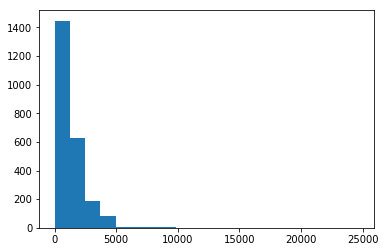

In [659]:
#Plotting a histogram of calcium content of recipes collected:
plt.hist(rec['calcium_mg'], bins = 20)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([535., 269., 160., 411., 360., 193., 136., 158.,  98.,  56.]),
 array([  0.95571705,  70.70160069, 140.44748432, 210.19336795,
        279.93925158, 349.68513521, 419.43101884, 489.17690247,
        558.92278611, 628.66866974, 698.41455337]),
 <a list of 10 Patch objects>)

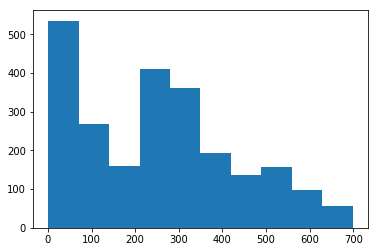

In [663]:
#Plotting a histogram of calcium content per serving of recipes collected:
plt.hist(ca_per_serving)

It looks like it was harder to find the higher amounts of calcium per serving which makes sense because it should probably take a few meals instead of one meal to reach the daily value of nutrients.  This is especially true for fat-soluble rather than water-soluble nutrients which have significant overdose risks.

In [666]:
#Looking at which columns have more null values (this will be inspected more thoroughly during 
#exploratory data analysis (EDA):
#rec.isnull().sum()

#### Collecting more data based on calcium content (looking for lunch then dinner then dessert then nibble dish types):

In [671]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'lunch'

#Running the function to collect recipes with the defined nutrient of interest amounts up to the 
#maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://norecipes.com/blog/2009/07/23/how-to-make-tortillas/
200
100
http://nymag.com/restaurants/articles/recipes/broccolirabe.htm
200
100
http://leitesculinaria.com/84915/recipes-baked-ricotta.html
200
100
http://www.marthastewart.com/332857/white-bean-and-tomato-salad
200
100
https://food52.com/recipes/2089-sweet-potato-pie
200
100
https://www.donnahay.com.au/recipes/dinners/classic-spaghetti-and-meatballs
200
100
https://smittenkitchen.com/2009/11/sweet-potato-buttermilk-pie/
200
100
http://www.epicurious.com/recipes/food/views/my-favorite-mexican-casserole-107199
200
100
https://www.allrecipes.com/recipe/241908/easy-caprese-mac-and-cheese/
200
100
http://www.biggirlssmallkitchen.com/2014/02/green-rice-with-jalapeno-garlic-lime.html
200
100
https://www.foodnetwork.com/recipes/turkey-quesadilla-recipe-1945338
200
100
http://www.foodista.com/recipe/MLYQPRKW/chicken-enchilada-casserole
200
100
http://www.bbcgoodfood.com/recipes/5967/
200
100
http://www.eatingwell.com/recipe/250

In [672]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'dinner'

#Running the function to collect recipes with the defined nutrient of interest amounts up to the 
#maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://ruhlman.com/2011/05/how-to-make-pasta/
200
100
http://www.seriouseats.com/recipes/2010/10/new-york-style-pizza.html
200
100
http://www.seriouseats.com/recipes/2011/07/grilled-cuban-sandwich-recipe.html
200
100
https://www.chowhound.com/recipes/easy-roasted-chicken-breast-31836
200
100
http://www.epicurious.com/recipes/food/views/Chicken-and-White-Bean-Chili-107492
200
100
http://www.myrecipes.com/recipe/greek-baked-ziti-0
200
100
https://www.tastingtable.com/cook/recipes/roast-lamb-leg-recipe
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a30044/cornbread-chorizo-stuffing-recipes-november/
200
100
https://www.allrecipes.com/recipe/12006/lazy-lasagna-i/
200
100
http://www.marthastewart.com/332237/tuna-cakes
200
100
http://www.myrecipes.com/recipe/chicken-tamale-casserole-0
200
100
http://simpleseasonal.com/recipes/sides/stuffed-pattypan-squash
200
100
http://www.thekitchn.com/recipe-for-a-crowd-big-game-day-barbacoa-165301
200
100
http://www.tasteofhome.com/re

In [673]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'dessert'

#Running the function to collect recipes with the defined nutrient of interest amounts up to the 
#maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.101cookbooks.com/archives/a-frozen-yogurt-recipe-to-rival-pinkberrys-recipe.html
200
100
http://www.seriouseats.com/recipes/2011/09/how-to-make-better-chocolate-milk-from-scratch-recipe.html
200
100
http://www.davidlebovitz.com/2008/02/a-butterscotch/
200
100
http://www.davidlebovitz.com/2012/08/butterscotch-sauce-recipe/
200
100
http://www.eatingwell.com/recipes/mini_chocolate_cheesecakes.html
200
100
http://www.bigoven.com/recipe/Bittersweet-Chocolate-Souffle/150967
200
100
http://lacucinaitalianamagazine.com/recipe/vanilla_sugar
200
100
https://food52.com/recipes/11451-peanut-butter-cheesecake-bars
200
100
https://eatingrules.com/pumpkin-chia-seed-pudding/
200
100
http://www.marthastewart.com/966155/seven-minute-frosting
200
100
http://www.wholefoodsmarket.com/recipes/292
200
100
http://pamelasalzman.com/vanilla-and-chocolate-chia-seed-pudding-recipes/
200
100
http://www.bbcgoodfood.com/recipes/4066/
200
100
http://www.myrecipes.com/recipe/peanut-butter-jelly-thum

In [674]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CA' #calcium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 700 #mg/day

#Defining the dishType for the query:
dish_type = 'nibble'

#Running the function to collect recipes with the defined nutrient of interest amounts up to the 
#maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.seriouseats.com/recipes/2011/11/pickled-garlic-recipe.html
200
80
https://smittenkitchen.com/2009/05/strawberry-shortcakes/
200
100
http://www.marthastewart.com/947547/corn-cob
200
100
https://www.bigoven.com/recipe/spinach-artichoke-dip/234958
200
0
200
100
http://www.finecooking.com/recipes/classic-basil-pesto.aspx
200
100
http://www.foodista.com/recipe/DHM4ZH7X/artichoke-spinach-dip
200
0
200
100
http://www.jamieoliver.com/recipes/pork-recipes/devils-on-horseback/
200
100
http://localsavour.com/recipe/baked-polenta-fries/
200
0
200
100
http://www.biggirlssmallkitchen.com/2010/11/big-girls-test-kitchen-james-beard-pot.html
200
29
http://www.westernnewyorker.org/2013/10/pumpkin-chocolate-chip-cookie-recipe.html
200
0
200
100
http://simplyrecipes.com/recipes/peanut_butter_cookies/
200
0
200
0
200
100
http://www.foodandwine.com/recipes/dijon-vinaigrette
200
0
200


#### Collecting recipes for specific nutrients (and nutrient ranges) for breakfast, lunch, dinner, dessert, and nibble dish types (using a for loop to streamline recipe data collection):

**Carbohydrates (carbs):** 225 - 325 grams/day recommended by Mayo Clinic 

Source: 
https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/carbohydrates/art-20045705

In [678]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CHOCDF' #carbohydrates

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 325 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.lottieanddoof.com/2013/03/seville-orange-marmalade/
200
86
http://www.bbc.co.uk/food/recipes/greengooseberryjam_6896
200
100
http://thepioneerwoman.com/cooking/2008/10/delicious-nutritious-pumpkin-butter/
200
100
http://www.food.com/recipe/strawberry-jam-59832
200
6
http://www.whatkumquat.com/2015/11/20/salted-caramel-apple-crisp/
200
100
http://www.bonappetit.com/recipe/warm-bacon-mushroom-vinaigrette
200
100
http://www.greenveganliving.com/2011/06/healthy-waffles-vegan-and-gluten-free.html
200
0
200
100
http://www.marthastewart.com/893674/green-eggs-and-ham
200
100
http://www.eatmystreet.net/2015/06/19/orange-cake-recipe/
200
0
200
100
http://www.saveur.com/article/Recipes/Reuben-Sandwich
200
100
http://hostthetoast.com/pretzel-bread/
200
0
200
100
http://honestcooking.com/homemade-chewy-granola-bars-recipe/
200
1
https://quinoaandcookies.wordpress.com/2015/01/28/peanut-butter-cup-brownie

**Cholesterol:** less than 300 mg/day recommended by FDA

Source: https://www.accessdata.fda.gov/scripts/interactivenutritionfactslabel/cholesterol.html

In [679]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'CHOLE' #cholesterol

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 300 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/96610/recipes-baked-eggs.html
200
100
http://norecipes.com/blog/how-to-scramble-an-egg/
200
100
http://www.bbcgoodfood.com/recipes/2306/
200
100
http://www.finecooking.com/recipes/classic-macaroni-cheese.aspx
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a23753/egg-in-the-hole-19/
200
100
http://www.lottieanddoof.com/2009/03/coffee-cake-2/
200
100
http://www.williams-sonoma.com/recipe/pulled-pork.html
200
100
http://www.tasteofhome.com/Recipes/Easy-Make-Ahead-Scrambled-Eggs
200
100
http://www.bbc.co.uk/food/recipes/orange_cake_57974
200
100
http://www.grouprecipes.com/101240/macaroni-cheese.html
200
100
http://www.grouprecipes.com/89946/breakfast-pizza.html
200
100
http://www.epicurious.com/recipes/food/views/Welsh-Rabbit-108892
200
100
https://www.allrecipes.com/recipe/40450/chicken-and-bacon-shish-kabobs/
200
100
http://www.myinvisiblecrown.com/2012/11/02/cuba

200
100
http://www.marthastewart.com/313200/blackberry-fools
200
100
http://www.myrecipes.com/recipe/microwave-brownies
200
100
http://www.recipezaar.com/Praline-French-Toast-18993
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.seriouseats.com/recipes/2011/03/banana-pudding-recipe.html
200
100
http://honestcooking.com/flourless-chocolate-cake-recipe/
200
100
http://www.saveur.com/article/Recipes/Mint-Jelly
200
100
https://www.foodnetwork.com/recipes/robert-irvine/old-fashioned-mashed-potatoes-recipe-1926920
200
92
http://recipes-plus.com/recipe/homemade-lemon-curd-18616
200
100
http://www.epicurious.com/recipes/food/views/Coconut-Macaroons-350891
200
100
http://www.bigoven.com/recipe/Snickerdoodles/160946
200
0
200
100
http://www.marthastewart.com/326813/coconut-bars
200
100
http://www.crumbsandchaos.net/2013/10/garlic-feta-dip/
200
0
200
100
https://food52.com/recipes/31899-homemade-cheez-its
200
100
http://

**Monounsaturated fat:** no more than 25% - 30% of daily calories in monounsaturated fats or polyunsaturated fats recommended which is 0.25 x 2000 kcal/day = 500 kcal/day to 0.30 x 2000 = 600 kcal/day. There are 9 cal/gram of fat, so (500 kcal/day)/(9 g/kcal) = approx. 56 g/day, and (600 kcal)/(9 g/kcal) = approx. 67 g/day.  Therefore, there should be no more than approx. 56 g - 67 g of monounsaturated fat per serving of each recipe.  This is assuming a normal 2000 kcal / day diet.  

I will therefore look at recipes with up to 67 g of monounsaturated fat per serving.

Source:
https://medlineplus.gov/ency/patientinstructions/000785.htm

In [680]:
 #Defining nutrient interested in for this query:
nutrient_of_interest = 'FAMS' #monounsaturated fat

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 67 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/03/scotch-eggs-recipe.html
200
63
http://leitesculinaria.com/86384/recipes-fried-egg-sandwich.html
200
100
http://www.bbcgoodfood.com/recipes/1720/
200
100
https://www.allrecipes.com/recipe/209578/blt/
200
0
200
100
http://smittenkitchen.com/2008/04/whole-wheat-apple-muffins/
200
100
http://mymansbelly.com/2009/09/11/give-your-man-the-butt-pulled-pork/
200
0
200
100
http://www.marthastewart.com/337292/macaroni-and-cheese
200
51
http://www.thesugarhit.com/2014/07/blueberry-pancake-granola.html
200
0
200
100
https://food52.com/recipes/13699-mom-s-corn-cake
200
0
200
0
200
100
http://www.foodrepublic.com/2014/07/28/meatless-monday-wild-rice-pancakes-recipe
200
0
200
0
200
100
http://www.tastingtable.com/cook/recipes/kouign-amann-recipe-homemade-french-pastry-laminated-dough
200
0
200
0
200
100
http://www.cookstr.com/recipes/blt
200
0
200
0
200
100
http://www.cookst

**Polyunsaturated fat:** no more than 25% - 30% of daily calories in monounsaturated fats or polyunsaturated fats recommended which is 0.25 x 2000 kcal/day = 500 kcal/day to 0.30 x 2000 = 600 kcal/day. There are 9 cal/gram of fat, so (500 kcal/day)/(9 g/kcal) = approx. 56 g/day, and (600 kcal)/(9 g/kcal) = approx. 67 g/day.  Therefore, there should be no more than approx. 56 g - 67 g of polyunsaturated fat per serving of each recipe.  This is assuming a normal 2000 kcal / day diet.  

I will therefore look at recipes with up to 67 g of polyunsaturated fat per serving.

Source:
https://medlineplus.gov/ency/patientinstructions/000785.htm

In [681]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FAPU' #polyunsaturated fat

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 67 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
63
http://www.epicurious.com/recipes/food/views/The-Best-Blts-101977
200
8
https://food52.com/recipes/499-bacon-and-eggs
200
100
http://www.marthastewart.com/317689/pear-butter
200
0
200
0
200
100
http://www.marthastewart.com/312767/peanut-butter-frosting
200
0
200
0
200
100
http://www.marthastewart.com/318892/zucchini-potato-pancakes
200
0
200
0
200
100
http://honestcooking.com/egg-muffins-lifestyle-changes/
200
0
200
0
200
100
http://www.marthastewart.com/342492/italian-pressed-sandwiches
200
0
200
0
200
100
http://www.bbc.co.uk/food/recipes/scotcheggs_85851
200
0
200
0
200
100
https://food52.com/recipes/664-dulce-de-leche-sandwich-cookies
200
0
200
0
200
100
http://www.eatingwell.com/recipe/251793/red-pepper-goat-cheese-frittata/
200
0
200
0
200
100
https://www.foodnetwork.com/recipes/chocolate-panini-recipe-1908721
200
0
200
0
200
100
http://norecipes.com/blog/2009/07/23/how-to-make-tortillas/
200
100

**Saturated fat:** no more than 10% of daily calories in saturated fats or trans fats recommended which is 0.10 x 2000 kcal/day = 200 kcal/day. There are 9 cal/gram of fat, so (200 kcal/day)/(9 g/kcal) = approx. 22 g/day.  Therefore, there should be no more than approx. 22 g of saturated fat per serving of each recipe.  This is assuming a normal 2000 kcal / day diet.  

I will therefore look at recipes with up to 22 g of saturated fat per serving.

Source:
https://medlineplus.gov/ency/patientinstructions/000785.htm

In [697]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FASAT' #saturated fat

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 22 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/03/scotch-eggs-recipe.html
200
100
http://leitesculinaria.com/92473/recipes-irish-coffee.html
200
100
http://www.seriouseats.com/recipes/2012/11/pumpkin-cornbread-recipe.html
200
100
https://food52.com/recipes/14086-potato-scones
200
100
http://www.kitchendaily.com/recipe/grilled-cheese-egg-hole-recipe
200
100
https://food52.com/recipes/1775-carrot-cake-pancakes
200
100
https://food52.com/recipes/1800-orange-pancakes-with-poppy-seeds
200
100
https://www.foodnetwork.com/recipes/michael-chiarello/banana-nutella-crepes-recipe-2012070
200
100
https://food52.com/recipes/14489-roasted-carrot-hummus
200
100
http://www.foodandwine.com/recipes/chocolate-caramel-sandwich-cookies
200
100
http://allrecipes.com/Recipe/Asparagus-and-Mushroom-Quiche/Detail.aspx
200
100
http://www.cookingchanneltv.com/recipes/bal-arneson/peach-lassi.html
200
100
https://elanaspantry.com/chocola

200
100
http://www.lottieanddoof.com/2014/06/blueberry-muffins/
200
100
https://food52.com/recipes/17858-rice-pudding
200
100
http://www.thedailymeal.com/recipes/pumpkin-chocolate-chip-bars-recipe
200
100
http://www.marthastewart.com/351249/almond-macaroons
200
100
http://www.marthastewart.com/901687/raspberry-cobbler
200
100
https://www.foodnetwork.com/recipes/ina-garten/brownie-tart-recipe-2103472
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.seriouseats.com/recipes/2011/06/sauced-chipotle-mayonnaise-recipe.html
200
100
http://www.seriouseats.com/recipes/2011/03/banana-pudding-recipe.html
200
100
http://ruhlman.com/2011/09/snickerdoodle-recipe/
200
100
http://www.thekitchn.com/-guest-post-from-tim-mazurek-o-84707
200
100
http://www.thedailymeal.com/oatmeal-chocolate-chip-cookies-recipe
200
100
http://www.marthastewart.com/333882/baked-plantain-chips
200
100
http://www.donnahay.com.au/recipes/kids/sweets/ch

**Total fat:** no more than 25% - 30% of daily calories in monounsaturated fats, polyunsaturated fats, saturated fats, or trans fats recommended (should have more unsaturated fats than trans fats in the total fat content for the day) which is 0.25 x 2000 kcal/day = 500 kcal/day to 0.30 x 2000 = 600 kcal/day. There are 9 cal/gram of fat, so (500 kcal/day)/(9 g/kcal) = approx. 56 g/day, and (600 kcal)/(9 g/kcal) = approx. 67 g/day.  Therefore, there should be no more than approx. 56 g - 67 g of polyunsaturated fat per serving of each recipe.  This is assuming a normal 2000 kcal / day diet.  

I will therefore look at recipes with up to 67 g of total fat per serving.

Source:
https://medlineplus.gov/ency/patientinstructions/000785.htm

In [698]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FAT' #total fat

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 67 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/04/maple-bacon-pancakes-recipe.html
200
100
http://leitesculinaria.com/6249/recipes-shrimp-and-grits.html
200
100
http://www.marthastewart.com/355859/plum-butter
200
100
http://www.marthastewart.com/868430/broccoli-cheddar-quiche
200
100
https://www.foodnetwork.com/recipes/food-network-kitchen/beer-bratwursts-recipe-2269095
200
100
http://www.foodrepublic.com/2013/10/26/brussels-sprouts-hash-recipe
200
100
http://www.cookstr.com/recipes/eggs-florentine
200
100
http://www.bigoven.com/recipe/monte-cristo-club/186399
200
100
http://honestcooking.com/egg-muffins-lifestyle-changes/
200
100
https://www.foodnetwork.com/recipes/ina-garten/buttermilk-cheddar-biscuits-recipe-1943876?soc=sharepin
200
100
http://www.food.com/recipe/breakfast-wraps-97284
200
100
http://www.marthastewart.com/342464/almond-cookies
200
100
http://www.bigoven.com/recipe/perfect-fried-eggs/181051

200
100
http://www.pbs.org/food/recipes/pecan-pie-bars/
200
100
http://www.tasteofhome.com/Recipes/Chocolate-Hazelnut-Torte
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://notwithoutsalt.com/homemade-potato-chips/
200
100
http://notwithoutsalt.com/homemade-potato-chips/
200
100
http://www.bbcgoodfood.com/recipes/2728/cranberry-sauce
200
100
http://www.bonappetit.com/recipes/2012/09/pineapple-upside-down-cake
200
100
http://www.bettycrocker.com/recipes/home-made-spaghetti-sauce/b66539b6-ce13-43ea-9a9b-9e1f98eef301
200
100
http://www.marthastewart.com/337192/pita-crisps
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a6616/flourless-chocolate-cake-recipe/
200
100
http://www.recipezaar.com/Creme-Brulee-145133
200
100
http://www.epicurious.com/recipes/food/views/Coconut-Macaroons-232018
200
100
https://www.allrecipes.com/recipe/255703/roasted-rosemary-cashews/
200
64
http://www.simplyscratch.com/2016/02/che

**Trans fat:** no more than 10% of daily calories in saturated fats or trans fats recommended which is 0.10 x 2000 kcal/day = 200 kcal/day. There are 9 cal/gram of fat, so (200 kcal/day)/(9 g/kcal) = approx. 22 g/day.  Therefore, there should be no more than approx. 22 g of trans fats per serving of each recipe.  This is assuming a normal 2000 kcal / day diet.  

I will therefore look at recipes with up to 22 g of trans fats per serving.

Note that trans fats will be analyzed (even if there is a ban on trans fats from U.S. restaurants and grocery stores) to see if we can get a distribution of different kinds of fats.

Sources:
https://medlineplus.gov/ency/patientinstructions/000785.htm  
Caitlin Dewey, https://www.washingtonpost.com/news/wonk/wp/2018/06/18/artificial-trans-fats-widely-linked-to-heart-disease-are-officially-banned/?utm_term=.1655f2600adf

In [699]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FATRN' #trans fat

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 22 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
12
http://leitesculinaria.com/94976/recipes-eggs-florentine-variations.html
200
1
http://www.bigoven.com/recipe/quick-apple-bread/10264
200
100
http://www.marthastewart.com/317689/pear-butter
200
0
200
0
200
100
http://www.marthastewart.com/312767/peanut-butter-frosting
200
0
200
0
200
100
http://www.epicurious.com/recipes/food/views/The-Best-Blts-101977
200
0
200
0
200
100
http://honestcooking.com/egg-muffins-lifestyle-changes/
200
0
200
0
200
100
http://www.marthastewart.com/342492/italian-pressed-sandwiches
200
0
200
0
200
100
http://www.simplyrecipes.com/recipes/irish_brown_bread/
200
0
200
0
200
100
http://www.bbc.co.uk/food/recipes/american-style_breakfast_66044
200
0
200
0
200
100
http://www.kitchendaily.com/recipe/macaroni-and-cheese-0
200
0
200
0
200
100
http://www.pbs.org/food/recipes/breakfast-sandwich/
200
0
200
0
200
100
http://norecipes.com/blog/2009/07/23/how-to-make-tortillas/
200
25
http:

**Iron:** up to 27 mg/day recommended (higher values recommended when pregnant or if have iron-deficiency anemia)

Source: 
https://ods.od.nih.gov/factsheets/Iron-HealthProfessional/

In [700]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FE' #iron

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 27 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/86384/recipes-fried-egg-sandwich.html
200
57
http://www.seriouseats.com/recipes/2011/03/irish-brown-bread-recipe.html
200
100
http://www.bbcgoodfood.com/recipes/1720/
200
100
https://www.justapinch.com/recipes/sauce-spread/jam/biscuits.html
200
0
200
100
http://smittenkitchen.com/2008/04/whole-wheat-apple-muffins/
200
1
https://www.justapinch.com/recipes/main-course/chicken/chicken-and-waffles-2.html
200
0
200
100
http://www.marthastewart.com/349894/buttermilk-pancakes
200
0
200
0
200
100
http://simplyrecipes.com/recipes/eggs_benedict/
200
0
200
0
200
100
http://www.saveur.com/article/Recipes/Tuna-Salad-Sandwiches
200
0
200
0
200
100
https://food52.com/recipes/13774-corn-and-bacon-pie
200
0
200
0
200
100
https://food52.com/recipes/8240-buttermilk-biscuits-with-sausage-gravy
200
0
200
0
200
100
http://www.simplyrecipes.com/recipes/matzo_brei/
200
0
200
0
200
100
http://www.am

**Fiber:** up to 38 g/day recommended (less for women than men and amount recommended differs depending on age)

Sources:  
https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/high-fiber-foods/art-20050948  
https://www.webmd.com/diet/eat-this-fiber-chart  
https://www.medicalnewstoday.com/articles/321993.php

In [701]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FIBTG' #fiber

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 38 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/84841/recipes-meyer-lemon-marmalade.html
200
40
https://food52.com/recipes/13155-hearty-raspberry-pancakes
200
100
http://www.thekitchn.com/easy-breakfast-recipe-breakfas-154632
200
100
https://www.allrecipes.com/recipe/18003/cucumber-sandwich/
200
0
200
100
https://food52.com/recipes/6099-plum-butter
200
100
https://thepajamachef.com/2015/04/24/easy-whole-wheat-bread/
200
0
200
100
http://www.bbcgoodfood.com/recipes/1558/cheesy-corn-cakes
200
17
https://quinoaandcookies.wordpress.com/2015/01/28/bean-lentil-chili-gluten-free-vegan/
200
0
200
100
http://simplyrecipes.com/recipes/eggs_benedict/
200
0
200
0
200
100
https://food52.com/recipes/8151-egg-nog-french-toast
200
0
200
0
200
100
https://food52.com/recipes/8811-winter-fruit-salad
200
0
200
0
200
100
https://food52.com/recipes/8240-buttermilk-biscuits-with-sausage-gravy
200
0
200
0
200
100
http://www.finecooking.com/recip

**Folate/folic acid:** 400 micrograms (mcg) per day for adults recommended, and up to 800 mcg per day if female planning to become pregnant 

Therefore, I'll look at recipes with up to 800 mcg of folate (in each serving).

Source:
https://www.mayoclinic.org/drugs-supplements-folate/art-20364625

In [6]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FOLDFE' #folate (equivalent)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 800 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/93789/recipes-5-minute-artisan-bread.html
200
70
http://smittenkitchen.com/2010/03/irish-soda-bread-scones/
200
100
http://www.marthastewart.com/330172/carrot-beet-juice
200
100
https://www.allrecipes.com/recipe/24677/muffuletta/
200
0
200
100
http://www.marthastewart.com/318065/apricot-stuffed-french-toast
200
100
http://www.eatcakefordinner.net/2012/10/bread-machine-dinner-rolls.html
200
0
200
100
https://food52.com/recipes/7842-cashew-milk
200
19
http://www.cozycountryliving.com/cranberry-banana-bread/
200
0
200
100
http://www.marthastewart.com/326493/cranberry-applesauce
200
0
200
0
200
100
https://food52.com/recipes/18400-toad-in-the-hole
200
0
200
0
200
100
http://thepioneerwoman.com/cooking/2014/02/croissant-french-toast/
200
0
200
0
200
100
http://www.marthastewart.com/946350/macaroni-and-cheese
200
0
200
0
200
100
http://www.cookingchanneltv.com/recipes/alton-brown/

In [18]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'FOLFD' #folate (food)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 800 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0
200
0


**Potassium:** up to 3,400 mg per day (high levels if male over 19 years old or pregnant female)

Source:
https://ods.od.nih.gov/factsheets/Potassium-HealthProfessional/  

This source says up to 2000 mg/day adequate: https://www.mayoclinic.org/drugs-supplements/potassium-supplement-oral-route-parenteral-route/description/drg-20070753

In [7]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'K' #potassium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 3400 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.101cookbooks.com/archives/green-juice-recipe.html
200
38
http://www.seriouseats.com/recipes/2011/03/irish-brown-bread-recipe.html
200
100
http://www.bbcgoodfood.com/recipes/1720/
200
100
http://www.grouprecipes.com/88749/full-english-breakfast.html
200
0
200
100
http://www.epicurious.com/recipes/food/views/Mozzarella-in-Carrozza-107795
200
97
http://www.stockpilingmoms.com/2013/07/raspberry-banana-smoothie-3/
200
0
200
100
http://honestcooking.com/bacon-egg-and-toast-cups/
200
0
200
0
200
100
http://www.simplyrecipes.com/recipes/boston_brown_bread/
200
0
200
0
200
100
http://www.kitchendaily.com/recipe/mixed-berry-jam
200
0
200
0
200
100
http://www.foodrepublic.com/recipes/breakfast-burger-recipe/
200
0
200
0
200
100
http://www.cookstr.com/recipes/toad-in-the-hole
200
0
200
0
200
100
http://cookalmostanything.blogspot.com/2009/10/whb-204.html
200
0
200
0
200
100
http://www.elanaspantry.com/

**Magnesium:** up to 420 mg per day (high levels if male over 14 years old or pregnant female)

Source:
https://ods.od.nih.gov/factsheets/Magnesium-HealthProfessional/

In [8]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'MG' #magnesium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 420 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/78189/recipes-breakfast-quinoa.html
200
66
http://www.epicurious.com/recipes/food/views/Boston-Brown-Bread-104112
200
100
http://norecipes.com/blog/2010/01/26/kedgeree-recipe/
200
100
https://www.hungryforever.com/recipe/quick-bircher-muesli-recipe/
200
0
200
100
https://food52.com/recipes/6099-plum-butter
200
100
http://themarathonmom.com/peanut-butter-granola-bars.htm
200
0
200
100
http://www.bbcgoodfood.com/recipes/1558/cheesy-corn-cakes
200
73
http://recipes-plus.com/recipe/tropical-granola-27520
200
0
200
100
http://simplyrecipes.com/recipes/eggs_benedict/
200
0
200
0
200
100
http://www.bbc.co.uk/food/recipes/eggsflorentine_88979
200
0
200
0
200
100
https://food52.com/recipes/38657-pretzels
200
0
200
0
200
100
http://honestcooking.com/cranberry-pecan-bread-recipe/
200
0
200
0
200
100
http://www.cookingchanneltv.com/recipes/alton-brown/instant-pancake-mix.html
200
0
200


**Sodium:** less than 2,300 mg per day recommended

Sources: 
https://www.fda.gov/food/nutrition-education-resources-and-materials/use-nutrition-facts-label-reduce-your-intake-sodium-your-diet  
https://www.cdc.gov/salt/pdfs/sodium_dietary_guidelines.pdf

In [9]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'NA' #sodium

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 2300 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/03/scotch-eggs-recipe.html
200
100
http://leitesculinaria.com/86384/recipes-fried-egg-sandwich.html
200
100
http://www.marthastewart.com/335202/berry-orange-smoothie
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a30146/citrus-marinated-olives-holiday-gifts/
200
100
http://www.grouprecipes.com/60144/best-cuban-sandwich.html
200
100
http://www.seriouseats.com/recipes/2012/02/baked-apple-cinnamon-walnut-oatmeal.html
200
100
https://www.foodnetwork.com/recipes/cheesy-sausage-breakfast-casserole-3415011
200
30
https://www.justapinch.com/recipes/dessert/other-dessert/cranberry-walnut-bread-pudding-ala-yumm.html
200
100
http://www.simplyrecipes.com/recipes/cheesy_skillet_cornbread/
200
100
https://www.allrecipes.com/recipe/233299/ultimate-breakfast-strata/
200
0
200
100
http://zesterdaily.com/cooking/how-to-make-croissants-from-scratch/
200
100
http://www.

200
0
200
100
http://honestcooking.com/coconut-macaroons-recipe-2/
200
100
http://newsouthfoodcompany.com/how-to-make-pickled-okra-and-5-amazing-okra-recipes/
200
0
200
100
http://www.foodrepublic.com/2012/05/25/kansas-city-barbecue-sauce-recipe
200
100
http://www.thefaresage.com/tzatziki/
200
0
200
100
http://www.food52.com/recipes/8895_simple_muhammara
200
18
http://www.food.com/recipe/spaghetti-sauce-84085
200
0
200
100
http://www.cookstr.com/recipes/the-union-square-cafeacutersquos-bar-nuts
200
0
200
0
200
100
http://www.cookingchanneltv.com/recipes/alton-brown/peanut-butter-fudge.html
200
0
200
0
200
100
http://www.latimes.com/food/la-fo-calcook-cookie-rec1-20120526-story.html
200
0
200
0
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a13888/old-fashioned-mashed-potatoes-recipe-mr1110/
200
0
200
0


**Energy:** up to 3200 kcal (AKA: Calories) per day depending on sex, age, weight, activity level, etc.

Note that a 2000 kcal diet will be the focus of the recommender, but higher-calorie content recipes were collected to compare these high-calorie recipes to similar lower-calorie recipe options. 

Source:  
https://health.gov/dietaryguidelines/2015/guidelines/appendix-2/

In [10]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'ENERC_KCAL' #energy

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 3200 #kcal/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.bbc.co.uk/food/recipes/greengooseberryjam_6896
200
72
http://www.seriouseats.com/recipes/2011/03/irish-brown-bread-recipe.html
200
100
http://www.marthastewart.com/1050555/carrot-mango-smoothie
200
100
https://www.allrecipes.com/recipe/214175/monte-cristo-sandwich/
200
0
200
100
https://smittenkitchen.com/2010/03/breakfast-pizza/
200
100
http://www.frugalmomeh.com/2015/11/cinnamon-roll-french-toast-bake.html
200
0
200
100
http://thepioneerwoman.com/cooking/2014/03/pancake-mini-muffins/
200
55
https://nu.spoonuniversity.com/cook/cranberry-oatmeal-cookies/
200
0
200
100
http://www.saveur.com/article/Recipes/Breakfast-Biscuits
200
0
200
0
200
100
http://www.marthastewart.com/348472/coconut-bread
200
0
200
0
200
100
http://www.foodrepublic.com/recipes/breakfast-burrito-recipe/
200
0
200
0
200
100
http://www.pbs.org/food/recipes/apricot-stuffed-french-toast/
200
0
200
0
200
100
http://www.pbs.or

**Niacin (B3):** up to 18 mg/day (high values when women pregnant or lactating or men over 14 years of age)

Sources:  
https://ods.od.nih.gov/factsheets/Niacin-HealthProfessional/
https://www.mayoclinic.org/drugs-supplements-niacin/art-20364984

In [11]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'NIA' #niacin (B3)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 18 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://notwithoutsalt.com/baguettes-at-home/
200
100
http://leitesculinaria.com/86384/recipes-fried-egg-sandwich.html
200
100
http://www.marthastewart.com/1050555/carrot-mango-smoothie
200
100
http://www.cookstr.com/recipes/kedgeree
200
100
http://beyondmeresustenance.com/buffalo-chicken-panini/
200
100
https://smittenkitchen.com/2010/03/breakfast-pizza/
200
100
http://www.mccormick.com/Recipes/Appetizer/BLT-Dip
200
11
http://www.culinarycolleen.com/cuban-quesadillas/
200
100
http://www.thekitchn.com/old-school-delight-make-your-o-142449
200
100
http://www.bigoven.com/recipe/Cuban-Sandwich/203258
200
0
200
100
http://food52.com/recipes/31385-apple-cheddar-muffins
200
100
http://www.recipezaar.com/Reuben-Sandwich-II-5229
200
0
200
100
http://www.marthastewart.com/851822/coffee-pudding
200
100
http://primalbitesblog.com/2013/11/19/classic-breakfast-sausage/
200
0
200
100
http://www.bbcgoodfood.com/recip

200
0
200
100
http://www.finecooking.com/recipes/vanilla_ice_cream.aspx
200
0
200
0
200
100
http://www.bonappetit.com/recipe/double-lemon-bars
200
0
200
0
200
100
http://food52.com/recipes/34378-lemon-bars
200
0
200
0
200
100
http://thepioneerwoman.com/cooking/2012/09/granola-bars/
200
0
200
0
200
100
http://www.latimes.com/food/la-fo-homepizzarec25a-2009mar25-story.html
200
0
200
0
200
100
http://www.pbs.org/food/fresh-tastes/brigadeiro/
200
0
200
0


**Phosphorus:** up to 1,250 mg/day (high values if 9-18 years of age)

Sources:
https://medlineplus.gov/ency/article/002424.htm  
https://www.ncbi.nlm.nih.gov/books/NBK109813/

In [12]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'P' #phosphorus

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 1250 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/73299/recipes-spoon-bread.html
200
100
http://www.seriouseats.com/recipes/2012/04/maple-bacon-pancakes-recipe.html
200
100
http://www.marthastewart.com/335202/berry-orange-smoothie
200
100
http://www.cookingchanneltv.com/recipes/david-rocco/rice-cake.html
200
67
http://www.recipezaar.com/Macaroni-Cheese-230440
200
100
http://thepioneerwoman.com/cooking/2007/09/biscuits_and_gr/
200
100
http://www.williams-sonoma.com/recipe/croque-madame.html
200
0
200
100
http://www.bonappetit.com/recipe/cranberry-nut-rolls
200
100
https://www.allrecipes.com/recipe/233299/ultimate-breakfast-strata/
200
0
200
100
http://www.bonappetit.com/recipe/scotch-eggs
200
100
https://www.allrecipes.com/recipe/24677/muffuletta/
200
0
200
100
http://www.marthastewart.com/316277/blackberry-crumb-bars
200
100
https://www.allrecipes.com/recipe/118601/chocolate-chip-pancakes/
200
0
200
100
https://www.tastingt

**Protein:** 50 g/day based on a 2000 kcal/day diet (this value depends on caloric needs, etc.)

Source:
https://www.accessdata.fda.gov/scripts/InteractiveNutritionFactsLabel/protein.html   
Note that too much protein can be an issue: https://health.usnews.com/wellness/food/articles/2018-08-03/are-you-getting-too-much-protein-heres-why-it-matters

In [13]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'PROCNT' #protein

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt = 50 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/03/scotch-eggs-recipe.html
200
100
http://leitesculinaria.com/6249/recipes-shrimp-and-grits.html
200
100
http://www.marthastewart.com/335202/berry-orange-smoothie
200
100
http://www.epicurious.com/recipes/food/views/Breakfast-Burritos-355417
200
100
https://www.allrecipes.com/recipe/221304/perfect-breakfast/
200
100
http://www.finecooking.com/recipes/basic-buttermilk-pancakes.aspx
200
100
http://www.cookstr.com/recipes/toad-in-the-hole-2
200
100
http://www.aspicyperspective.com/2014/09/chocolate-smoothie-recipe.html
200
100
http://www.foodrepublic.com/2011/10/23/toad-hole-recipe
200
100
http://www.delish.com/cooking/recipe-ideas/recipes/a13561/quick-breakfast-tostada-recipe-mr1010/
200
100
https://www.campbells.com/kitchen/recipes/buffalo-chicken-quesadillas/
200
100
http://www.marthastewart.com/344281/skillet-cornbread
200
100
https://www.allrecipes.com/recipe/

200
0
200
100
http://www.marthastewart.com/1049836/creamy-buttermilk-dressing
200
100
http://www.threeolivesbranch.com/recipe/basil-pesto/
200
0
200
100
http://www.jamieoliver.com/recipes/uncategorised-recipes/granola-bars/
200
100
http://breannasrecipebox.blogspot.com/2013/03/buttermilk-biscuits.html
200
0
200
100
http://www.thekitchn.com/recipe-caramel-popcorn-85371
200
78
http://idmuchratherbakethan.blogspot.com/2014/04/monster-cookies.html
200
0
200
100
http://www.marthastewart.com/342353/chocolate-pudding
200
0
200
0
200
100
http://www.finecooking.com/recipes/celery-root-remoulade.aspx
200
0
200
0
200
100
http://www.eatingwell.com/recipe/250991/all-american-bbq-sauce/
200
0
200
0
200
100
http://www.donnahay.com.au/recipes/kids/sweets/chocolate-brownie
200
0
200
0
200
100
http://www.foodandwine.com/recipes/maple-chipotle-barbecue-sauce
200
0
200
0


**Riboflavin (B2):** up to 1.6 mg/day recommended (high levels recommended when pregnant or breast-feeding)

Sources:
https://ods.od.nih.gov/factsheets/Riboflavin-HealthProfessional/  
https://lpi.oregonstate.edu/mic/vitamins/riboflavin

In [14]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'RIBF' #riboflavin (B2)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  1.6 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2014/01/peach-maple-ginger-smoothie-recipe.html
200
100
http://www.saveur.com/article/Recipes/Rasperry-Freezer-Jam
200
100
http://www.thekitchn.com/easy-breakfast-recipe-breakfas-154632
200
100
http://www.simplyrecipes.com/recipes/irish_brown_bread/
200
100
http://www.finecooking.com/recipes/basic-buttermilk-pancakes.aspx
200
100
http://www.lottieanddoof.com/2008/10/cranberry-pecan-bread-cranberries-are-here/
200
100
http://www.pbs.org/food/recipes/pumpkin-cornbread/
200
100
http://honestcooking.com/bacon-egg-and-toast-cups-2/
200
100
https://www.chowhound.com/recipes/nutella-stuffed-french-toast-31741
200
100
http://www.williams-sonoma.com/recipe/croque-madame.html
200
100
http://www.foodandwine.com/recipes/peach-jam
200
100
http://honestcooking.com/breakfast-in-bed-baked-eggs-with-spinach

200
100
http://food52.com/recipes/28042-homemade-sweetened-condensed-milk
200
100
http://lacucinaitalianamagazine.com/recipe/trofie-with-fresh-fava-beans-and-bottarga/?gtnjs=1
200
100
http://www.erinsfoodfiles.com/2008/10/pumpkin-cream-cheese-truffles.html
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.101cookbooks.com/archives/quick-pickled-zucchini-recipe.html
200
100
http://leitesculinaria.com/82346/recipes-homemade-snickers-bar.html
200
100
http://www.saveur.com/article/Recipes/Cranberry-Sauce
200
100
http://www.grouprecipes.com/50627/chocolate-chip-cookies.html
200
100
http://www.finecooking.com/recipes/classic-basil-pesto.aspx
200
100
http://www.marthastewart.com/334395/celery-root-remoulade
200
100
http://jessfuel.com/2012/10/26/halloween-chex-mix/
200
100
http://www.foodrepublic.com/2011/05/08/bes

**Sugar:** up to 38 g/day of added sugars (higher levels if higher calorie intake recommended - typically more calories for men than women and children)

Unfortunately natural sugars are not included in this value.  I'll look at recipes with up to 38 g/day * 5 = 190 g/day of sugar to account for fruits and higher sugar content vegetables that can be in recipes.  It will also be interesting to look at high-sugar recipes and where the sugars come from (natural sources such as fruits and vegetables or added sugar sources such as syrups).

Sources:  
https://www.accessdata.fda.gov/scripts/InteractiveNutritionFactsLabel/sugars.html    
http://sugarscience.ucsf.edu/sugar-faq.html#.XNdZFutKhn4  
https://universityhealthnews.com/daily/nutrition/high-sugar-content-fruit-damaging-health-waistline/  
https://www.huffingtonpost.com.au/2017/09/14/how-much-natural-sugar-should-we-eat-a-day_a_23208377/  
https://www.medicalnewstoday.com/articles/324673.php

In [20]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'SUGAR.added' #sugars (added)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  38 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.marthastewart.com/317689/pear-butter
200
100
http://www.marthastewart.com/317689/pear-butter
200
100
http://www.marthastewart.com/317689/pear-butter
200
100
http://www.marthastewart.com/312767/peanut-butter-frosting
200
100
http://www.marthastewart.com/312767/peanut-butter-frosting
200
100
http://www.marthastewart.com/312767/peanut-butter-frosting
200
100
http://www.marthastewart.com/318892/zucchini-potato-pancakes
200
100
http://www.marthastewart.com/318892/zucchini-potato-pancakes
200
100
http://www.marthastewart.com/318892/zucchini-potato-pancakes
200
100
http://simplyrecipes.com/recipes/strawberry_frozen_yogurt/
200
100
http://simplyrecipes.com/recipes/strawberry_frozen_yogurt/
200
100
http://simplyrecipes.com/recipes/strawberry_froz

200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.saveur.com/article/Recipes/Cranberry-Sauce
200
100
http://www.saveur.com/article/Recipes/Cranberry-Sauce
200
100
http://www.saveur.com/article/Recipes/Cranberry-Sauce
200
100
http://www.marthastewart.com/334395/celery-root-remoulade
200
100
http://www.marthastewart.com/334395/celery-root-remoulade
200
100
http://www.marthastewart.com/334395/celery-root-remoulade
200
100
http://www.saveur.com/article/Recipes/Classic-Carrot-Ginger-Dressing
200
100
http://www.saveur.com/article/Recipes/Classic-Carrot-Ginger-Dressing
200
100
http://www.saveur.com/article/Recipes/Classic-Carrot-Ginger-Dressing
200
100
http://www.saveur.com/article/Recipes/Lemon-Curd-1000079419
200
100
http://www.saveur.com/article/Recipes/Lemon-Curd-1000079419
200
100
http://www.saveur.com/article

In [19]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'SUGAR' #sugars (total)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  190 #g/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.lottieanddoof.com/2013/03/seville-orange-marmalade/
200
73
http://smittenkitchen.com/2011/09/peach-butter/
200
100
http://www.simplyrecipes.com/recipes/egg_nests/
200
100
http://ilonaspassion.com/gooseberry-jam/
200
0
200
100
http://www.foodrepublic.com/recipes/best-blt-sandwich/
200
100
http://chokolatpimientae.blogspot.com/2015/11/homemade-ricotta-cheese.html
200
0
200
100
http://www.bonappetit.com/recipe/cranberry-nut-rolls
200
100
http://www.crabbycook.com/2009/04/orange-cake.html
200
0
200
100
http://www.tastingtable.com/entry_detail/chefs_recipes/17783/How_to_Make_Classic_BLT_Sandwich.htm
200
43
http://www.crumbsandchaos.net/2012/11/eggnog-cranberry-muffins/
200
0
200
100
http://www.epicurious.com/recipes/food/views/Macaroni-and-Cheese-51218810
200
0
200
0
200
100
http://www.biggirlssmallkitchen.com/2010/10/recipe-flash-quinoa-muffins.html
200
0
200
0
200
100
http://www.simplyrecipes.

**Thiamin (B1):** up to 1.4 mg/day recommended (high values especially when pregnant or lactating)

Sources:  
https://ods.od.nih.gov/factsheets/Thiamin-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-thiamin/art-20366430

In [21]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'THIA' #thiamin (B1)

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  1.4 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.marthastewart.com/335202/berry-orange-smoothie
200
100
http://www.marthastewart.com/335202/berry-orange-smoothie
200
100
http://www.bbcgoodfood.com/recipes/1720/
200
100
http://www.foodrepublic.com/recipes/reuben-sandwich-recipe/
200
100
http://www.foodrepublic.com/recipes/reuben-sandwich-recipe/
200
100
http://smittenkitchen.com/2008/04/whole-wheat-apple-muffins/
200
100
http://www.chowhound.com/recipes/beer-biscuits-10437
200
100
http://www.chowhound.com/recipes/beer-biscuits-10437
200
100
http://www.bbcgoodfood.com/recipes/1558/cheesy-corn-cakes
200
100
http://www.foodandwine.com/recipes/meyer-lemon-marmalade
200
100
http://www.foodandwine.com/recipes/meyer-lemon-marmalade
200
100
http://simplyrecipes.com/recipes/sausage_breakfast_cas

200
100
http://www.seriouseats.com/recipes/2014/04/gluten-free-strawberry-shortcakes-recipe.html
200
100
http://www.marthastewart.com/356022/peanut-butter-ice-cream
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.marthastewart.com/947547/corn-cob
200
100
http://www.marthastewart.com/947547/corn-cob
200
100
http://www.davidlebovitz.com/2011/10/cucumber-raita-recipe/
200
100
http://www.epicurious.com/recipes/food/views/Pickled-Peppers-366722
200
100
http://www.epicurious.com/recipes/food/views/Pickled-Peppers-366722
200
100
http://www.marthastewart.com/340347/tomato-sauce
200
100
http://www.bonappetit.com/recipe/italian-salsa-verde
200
100
http://www.bonappetit.com/recipe/italian-salsa-verde
200
100
http

**Vitamin E:** up to 19 mg/day recommended (high values especially when lactating)

Sources:  
https://ods.od.nih.gov/factsheets/VitaminE-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-vitamin-e/art-20364144

In [22]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'TOCPHA' #vitamin E

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  19 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2012/03/scotch-eggs-recipe.html
200
39
http://www.seriouseats.com/recipes/2015/09/zucchini-bread-recipe.html
200
100
http://www.thekitchn.com/easy-breakfast-recipe-breakfas-154632
200
100
http://www.hummusapien.com/peanut-butter-jelly-protein-smoothie/
200
0
200
100
https://food52.com/recipes/6099-plum-butter
200
44
http://southernkrazed.com/2014/02/deep-fried-onion-rings-recipe/
200
0
200
100
http://www.bbcgoodfood.com/recipes/1558/cheesy-corn-cakes
200
0
200
0
200
100
http://simplyrecipes.com/recipes/eggs_benedict/
200
0
200
0
200
100
http://www.saveur.com/article/Recipes/Tuna-Salad-Sandwiches
200
0
200
0
200
100
https://food52.com/recipes/8231-raised-waffles
200
0
200
0
200
100
http://www.saveur.com/article/Recipes/Eggs-Benedict
200
0
200
0
200
100
http://www.bonappetit.com/recipes/2011/09/shrimp-and-grits
200
0
200
0
200
100
http://www.pbs.org/food/recipes/kouign

**Vitamin A:** up to 1300 mcg/day recommended (high values especially when lactating)

Sources:  
https://ods.od.nih.gov/factsheets/VitaminA-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-vitamin-a/art-20365945

In [23]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITA_RAE' #vitamin A

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  1300 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2010/10/how-to-make-pumpkin-butter-recipe.html
200
80
http://www.marthastewart.com/1050555/carrot-mango-smoothie
200
100
http://thepioneerwoman.com/cooking/2009/08/strawberry-jam-part-ii/
200
100
http://allrecipes.com/Recipe/Pumpkin-Oatmeal-2/Detail.aspx
200
0
200
100
http://www.jamieoliver.com/recipes/egg-recipes/smoked-salmon-scrambled-eggs
200
100
http://www.foodista.com/recipe/FL5WJRRY/quick-breakfast-pizza
200
0
200
100
http://www.thekitchn.com/old-school-delight-make-your-o-142449
200
92
http://mysouthernsweettooth.com/breakfast/sweet-potato-breakfast-hash/
200
0
200
100
http://simplyrecipes.com/recipes/tuna_salad_sandwich/
200
0
200
0
200
100
http://honestcooking.com/homemade-chewy-granola-bars-recipe/
200
0
200
0
200
100
http://orangette.blogspot.com/2006/09/9-am-sunday-baked-eggs-and-bacon.html
200
0
200
0
200
100
http://honestcooking.com/banana-bread-muffin

**Vitamin B12:** up to 2.8 mcg/day recommended (high values especially when lactating)
    
Sources:   
https://ods.od.nih.gov/factsheets/VitaminB12-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-vitamin-b12/art-20363663

In [24]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITB12' #vitamin B12

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  2.8 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2014/01/peach-maple-ginger-smoothie-recipe.html
200
100
http://www.marthastewart.com/341357/matzo-brei
200
100
http://www.marthastewart.com/1050555/carrot-mango-smoothie
200
100
http://honestcooking.com/bacon-egg-and-toast-cups/
200
100
http://cafefernando.com/apricot-bars/
200
100
http://www.epicurious.com/recipes/food/views/Mozzarella-in-Carrozza-107795
200
100
http://www.foodrepublic.com/recipes/breakfast-burger-recipe/
200
100
https://food52.com/recipes/1742-buttermilk-pancakes
200
100
http://www.saveur.com/article/Recipes/Saveur-100-2011-Irish-Coffee
200
100
https://www.foodnetwork.com/recipes/rachael-ray/date-shakes-recipe-1914836
200
100
http://www.sfgate.com/food/recipes/detail.html?rid=17691&sorig=qs
200
100
http://simplyrecipes.com/recipes/tuna_salad_sandwich/
200
100
http://www.d

200
100
http://leitesculinaria.com/4188/recipes-pear-cranberry-crumble.html
200
100
http://www.seriouseats.com/recipes/2015/12/the-best-gingersnap-cookie-recipe.html
200
100
http://www.myrecipes.com/recipe/peanut-butter-cup-brownies
200
100
http://norecipes.com/strawberry-lemon-bars-recipe
200
100
http://www.jamieoliver.com/recipes/chocolate-recipes/chocolate-biscotti/
200
100
http://www.goodhousekeeping.com/food-recipes/a14020/mocha-pots-de-creme-recipe-ghk0212/
200
100
http://www.marthastewart.com/332871/cream-cheese-buttercream-frosting
200
100
http://leitesculinaria.com/76137/recipes-plum-blueberry-upside-down-cake.html
200
100
http://www.thedailymeal.com/lemon-cake-recipe
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://cafefernando.com/basil-pesto-recipe/
200
100
http://www.marthastewart.com/947547/corn-c

**Vitamin B6:** up to 2.0 mg/day recommended (high values especially when pregnant or lactating) 

Sources:  
https://ods.od.nih.gov/factsheets/VitaminB6-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-vitamin-b6/art-20363468

In [25]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITB6A' #vitamin B6

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  2.0 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.seriouseats.com/recipes/2013/04/eggs-baked-in-avocado-recipe.html
200
100
http://www.marthastewart.com/330172/carrot-beet-juice
200
100
http://norecipes.com/blog/2010/01/26/kedgeree-recipe/
200
100
http://www.cookstr.com/recipes/tuna-melt
200
100
http://www.marthastewart.com/349027/mexican-corn-cakes
200
100
http://ruhlman.com/2013/08/le-creuset-sauce-croque-madame/
200
100
https://www.foodnetwork.com/recipes/amanda-freitag/shrimp-and-grits-3213182
200
100
http://www.saveur.com/article/Recipes/Hangtown-Oyster-Bacon-Omelette
200
100
http://www.epicurious.com/recipes/food/views/The-Best-Blts-101977
200
100
http://www.tasteofhome.com/recipes/taco-quiche
200
100
http://www.marthastewart.com/1050148/cherry-almond-granola
200
100
http://honestcooking.com/egg-muffins-lifestyle-changes/
200
100
http://www.food.com/recipe/

200
23
http://www.food.com/recipe/fishermans-pie-140396
200
100
http://www.foodrepublic.com/recipes/holy-grail-status-perfect-paleo-pie-crust-recipe/
200
100
http://www.seriouseats.com/recipes/2013/11/apple-oatmeal-cinnamon-cookies-recipe.html
200
0
200
100
http://www.lottieanddoof.com/2009/02/my-favorite-cake-period/
200
100
http://www.finecooking.com/recipes/pumpkin-pie-flan-crustless.aspx
200
0
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2015/02/double-chocolate-pudding-recipe-with-caramelized-cocoa-nibs/
200
100
http://www.davidlebovitz.com/2008/12/candied-ginger/
200
100
http://www.seriouseats.com/recipes/2011/01/homemade-kit-kat-bars-recipe.html
200
100
http://www.davidlebovitz.com/2011/10/cucumber-raita-recipe/
200
100
https://www.foodnetwork.com/recipes/old-fashioned-banana-pudding-3415297
200
100
http://www.chezpim.com/blogs/2008/09/fifteen-minutes.html#more
200
100
http://www.ma

Vitamin C: Up to 125 mg/day recommended (high values especially when pregnant or lactating or if a smoker (need 35 mg/day more if smoker))

Note: upper limit of ingestion: 2000 mg/day 

Sources:  
https://ods.od.nih.gov/factsheets/VitaminC-HealthProfessional/  
https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/expert-answers/vitamin-c/faq-20058030

In [27]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITC' #vitamin C

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  125 #mg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://www.lottieanddoof.com/2013/03/seville-orange-marmalade/
200
100
http://leitesculinaria.com/43652/recipes-strawberry-jam.html
200
100
http://www.marthastewart.com/945345/scrambled-eggs
200
100
http://www.closetcooking.com/2010/04/tomato-and-feta-baked-eggs.html
200
76
http://www.food.com/recipe/strawberry-basil-jam-243432
200
100
https://smittenkitchen.com/2007/10/pumpkin-bread-pudding/
200
100
http://www.recipezaar.com/Peaches-Cream-Smoothie-254131
200
0
200
100
http://food52.com/recipes/26766-avocado-toast
200
100
http://www.thefoodieskitchen.com/2012/02/watermelon-smoothie/
200
0
200
100
https://food52.com/recipes/241-asparagus-mimosa
200
100
http://www.fortheloveofbasil.com/detox-green-smoothie/
200
0
200
100
http://www.epicurious.com/recipes/food/views/Macaroni-and-Cheese-239270
200
100
http://www.justputzing.com/2013/05/garden-scramble.html
200
0
200
100
http://www.marthastewart.com/312625

200
0
200
0
200
100
http://www.pbs.org/food/recipes/easy-gingerbread-cookies/
200
0
200
0
200
100
http://www.cookstr.com/recipes/salsa-verde
200
0
200
0


**Vitamin D:** up to 20 mcg/day recommended (high levels if over 70 years of age)

Sources:  
https://ods.od.nih.gov/factsheets/VitaminD-HealthProfessional/  
https://www.mayoclinic.org/drugs-supplements-vitamin-d/art-20363792

In [28]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITD' #vitamin D

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  20 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
66
https://smittenkitchen.com/2006/12/loopy-breakfast-goodness/
200
19
http://www.epicurious.com/recipes/food/views/Homemade-Ricotta-Cheese-51244020
200
100
http://www.marthastewart.com/317689/pear-butter
200
0
200
0
200
100
http://www.bonappetit.com/recipe/blueberry-orange-smoothie
200
0
200
0
200
100
http://cafefernando.com/apricot-bars/
200
0
200
0
200
100
http://www.marthastewart.com/353224/croque-madame
200
0
200
0
200
100
https://www.tastingtable.com/cook/recipes/croissants-recipe-french-pastry
200
0
200
0
200
100
http://www.sfgate.com/food/recipes/detail.html?rid=17691&sorig=qs
200
0
200
0
200
100
http://www.finecooking.com/recipes/homemade-graham-crackers.aspx
200
0
200
0
200
100
http://www.kitchendaily.com/recipe/mummy-dogs
200
0
200
0
200
100
http://www.cookstr.com/recipes/croissants
200
0
200
0
200
100
http://norecipes.com/blog/2009/07/23/how-to-make-tortillas/
200
100
http://www.travelerslunch

**Vitamin K:** 120 mcg/day adequate (high levels if male over 19 years old)

Source:  
https://ods.od.nih.gov/factsheets/VitaminK-HealthProfessional/  

In [29]:
#Defining nutrient interested in for this query:
nutrient_of_interest = 'VITK1' #vitamin K

#Defining maximum amount of the nutrient of interest recommended per day:
max_amt =  120 #mcg/day

#Defining the dishType list for the query:
dish_type_list = ['breakfast', 'lunch', 'dinner', 'dessert', 'nibble']

#Collecting recipes for each dish type using a for loop:
for dish_type in dish_type_list:
    #Running the function to collect recipes with the defined nutrient of interest amounts up to the 
    #maximum recommended amount per day and the specified dishType and saving the recipes to a csv:
    recipes_by_nutrient_range_and_dish_type(dish_type, nutrient_of_interest, max_amt)

200
100
http://www.davidlebovitz.com/2014/06/the-hanky-panky-cocktail-recipe/
200
100
http://leitesculinaria.com/74779/recipes-easy-rhubarb-jam.html
200
100
http://www.seriouseats.com/recipes/2011/07/spinach-baked-eggs-breakfast-brunch-recipe.html
200
100
http://food52.com/recipes/22633-strawberry-basil-lemonade
200
100
http://www.bigoven.com/recipe/antioxidant-smoothie/361856
200
21
http://putonyourcakepants.com/2013/09/09/milkless-monday-potato-spinach-frittata/
200
100
http://www.marthastewart.com/336868/buttermilk-cornbread
200
100
https://blog.nuts.com/blueberry-chia-seed-jam-recipe/
200
0
200
100
http://www.marthastewart.com/314682/jam-sandwich-cookies
200
56
http://www.foodvedam.com/cheesy-egg-muffins-recipe/
200
0
200
100
http://www.marthastewart.com/350079/sticky-buns
200
0
200
0
200
100
http://chocolateandzucchini.com/recipes/cookies-small-cakes/banana-pecan-muffins-recipe/
200
0
200
0
200
100
http://www.eatingwell.com/recipe/253113/watermelon-agua-fresca/
200
0
200
0
200
100